In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
import pandas as pd

In [2]:
def rab(x1, x2, x3, x4):
    return np.power(((x1-x3)**2+(x2-x4)**2), 1/2)


def rac(x1, x2, x5, x6):
    return np.power(((x1-x5)**2+(x2-x6)**2), 1/2)


def rbc(x3, x4, x5, x6):
    return np.power(((x3-x5)**2+(x4-x6)**2), 1/2)


def T(w, t, m1, m2, m3, G):
    x1, p1, x2, p2, x3, p3, x4, p4, x5, p5, x6, p6 = w
    return np.array([p1/m1, -G*m1*m2*(x1-x3)/rab(x1, x2, x3, x4)**3-G*m1*m3*(x1-x5)/rac(x1, x2, x5, x6)**3,
                     p2/m1, -G*m1*m2*(x2-x4)/rab(x1, x2, x3, x4)**3 -
                     G*m1*m2*(x2-x6)/rac(x1, x2, x5, x6)**3,
                     p3/m2, -G*m1*m2*(x3-x1)/rab(x1, x2, x3, x4)**3 -
                     G*m2*m3*(x3-x5)/rbc(x3, x4, x5, x6)**3,
                     p4/m2, -G*m1*m2*(x4-x2)/rab(x1, x2, x3, x4)**3 -
                     G*m2*m3*(x4-x6)/rbc(x3, x4, x5, x6)**3,
                     p5/m3, -G*m3*m1*(x5-x1)/rac(x1, x2, x5, x6)**3 -
                     G*m2*m3*(x5-x3)/rbc(x3, x4, x5, x6)**3,
                     p6/m3, -G*m3*m1*(x6-x2)/rac(x1, x2, x5, x6)**3-G*m3*m2*(x6-x4)/rbc(x3, x4, x5, x6)**3])


def F(w, t, a, m):  # a=G*M
    x1, p1, x2, p2 = w
    return np.array([p1/m, -a*m*x1/(x1**2+x2**2)**3/2, p2/m, -a*m*x2/(x1**2+x2**2)**3/2])

Text(0,0.5,'$y$')

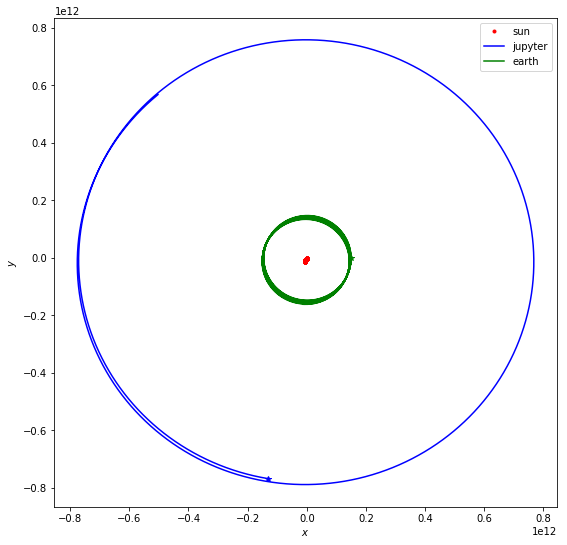

In [3]:
m1 = 1.9891*10**30     # 太阳质量
m2 = 1.90*10**27  # 木星质量
m3 = 5.965*10**24      # 地球质量
G = 6.754*10**(-11)   # 引力常量
r2 = 7.79*10**11  # 木星与太阳的距离
r3 = 1.496*10**11      # 日地距离
v2 = 1.307*10**4  # 木星公转速度
v3 = 2.9783*10**4      # 地球平均公转速度


# 改变初始地球动量值和木星位置
# p=1.36*m3*v3
p = m3*v3

a = -99.72
theta = a*np.pi/180

t0 = np.arange(0, 5*10**8, 1000)
track0 = odeint(T, (0, 0, 0, 0,  # 太阳
                    r2*np.cos(theta), m2*v2*np.sin(theta), r2 * \
                    np.sin(theta), -m2*v2*np.cos(theta),  # 木星
                    r3, 0, 0, -p  # 地球
                    ), t0, args=(m1, m2, m3, G))


plt.figure(figsize=(9, 9))
plt.plot(track0[:, 0], track0[:, 2], 'r.')
plt.plot(track0[:, 4], track0[:, 6], 'b')
plt.plot(track0[:, 8], track0[:, 10], 'g')
plt.plot(r3, 0, 'g*')
plt.plot(r2*np.cos(theta), r2*np.sin(theta), 'b*')

plt.legend(["sun", "jupyter", "earth"])
plt.xlabel("$x$")
plt.ylabel("$y$")

Text(0,0.5,'$y$')

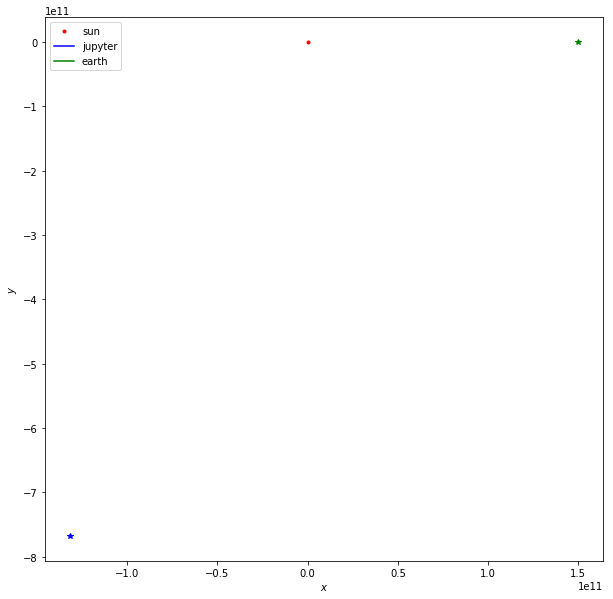

In [4]:
m1 = 1.9891*10**30     # 太阳质量
m2 = 1.90*10**27  # 木星质量
m3 = 5.965*10**24      # 地球质量
G = 6.754*10**(-11)    # 引力常量
r2 = 7.79*10**11  # 木星与太阳的距离
r3 = 1.496*10**11      # 日地距离
v2 = 1.307*10**4  # 木星公转速度
v3 = 2.9783*10**4      # 地球平均公转速度

# 改变初始地球动量值和木星位置
# p=1.36*m3*v3
p = m3*v3

a = -99.72
theta = a*np.pi/180
t0 = np.arange(0, 1000, 1000)  # 4.32*10**7
track0 = odeint(T, (0, 0, 0, 0,
                    r2*np.cos(theta), m2*v2*np.sin(theta), r2 *
                    np.sin(theta), -m2*v2*np.cos(theta),
                    r3, 0, 0, -p
                    ), t0, args=(m1, m2, m3, G))
plt.figure(figsize=(10, 10))
plt.plot(track0[:, 0], track0[:, 2], 'r.')
plt.plot(track0[:, 4], track0[:, 6], 'b')
plt.plot(track0[:, 8], track0[:, 10], 'g')
plt.plot(r3, 0, 'g*')
plt.plot(r2*np.cos(theta), r2*np.sin(theta), 'b*')
plt.legend(["sun", "jupyter", "earth"])
plt.xlabel("$x$")
plt.ylabel("$y$")
# plt.axis([-6.12*10**11,-6*10**11,-4.925*10**11,-4.8*10**11])

In [5]:
def r(x1, x2, y1, y2):
    return np.power(((x1-x2)**2+(y1-y2)**2), 3/2)


def T1(w, t, m, G):
    x1, y1, x2, y2, x3, y3, x4, y4, p1x, p1y, p2x, p2y, p3x, p3y, p4x, p4y = w
    m1, m2, m3, m4 = m
    return np.array([
        p1x/m1,
        p1y/m1,
        p2x/m2,
        p2y/m2,
        p3x/m3,
        p3y/m3,
        p4x/m4,
        p4y/m4,
        (-G*m1*m2*(x1-x2)/r(x1, x2, y1, y2)-G*m1*m3*(x1-x3) /
         r(x1, x3, y1, y3)-G*m1*m4*(x1-x4)/r(x1, x4, y1, y4)),
        (-G*m1*m2*(y1-y2)/r(x1, x2, y1, y2)-G*m1*m3*(x1-x3) /
         r(x1, x3, y1, y3)-G*m1*m4*(x1-x4)/r(x1, x4, y1, y4)),
        (G*m1*m2*(x1-x2)/r(x1, x2, y1, y2)-G*m2*m3*(x2-x3) /
         r(x2, x3, y2, y3)-G*m2*m4*(x2-x4)/r(x2, x4, y2, y4)),
        (G*m1*m2*(y1-y2)/r(x1, x2, y1, y2)-G*m2*m3*(y2-y3) /
         r(x2, x3, y2, y3)-G*m2*m4*(y2-y4)/r(x2, x4, y2, y4)),
        (G*m1*m3*(x1-x3)/r(x1, x3, y1, y3)+G*m2*m3*(x2-x3) /
         r(x2, x3, y2, y3)-G*m3*m4*(x3-x4)/r(x3, x4, y3, y4)),
        (G*m1*m3*(y1-y3)/r(x1, x3, y1, y3)+G*m2*m3*(y2-y3) /
         r(x2, x3, y2, y3)-G*m3*m4*(y3-y4)/r(x3, x4, y3, y4)),
        (G*m1*m4*(x1-x4)/r(x1, x4, y1, y4)+G*m2*m4*(x2-x4) /
         r(x2, x4, y2, y4)+G*m3*m4*(x3-x4)/r(x3, x4, y3, y4)),
        (G*m1*m4*(y1-y4)/r(x1, x4, y1, y4)+G*m2*m4*(y2-y4) /
         r(x2, x4, y2, y4)+G*m3*m4*(y3-y4)/r(x3, x4, y3, y4)),
    ])

In [6]:
m4 = 10**(-10)
m = np.array([m1, m3, m2, m4])
x0 = track0[len(track0)-1]
#x1 = np.append([x0])
x1 = np.zeros((1, 16))
x1[0, 0] = x0[0]
x1[0, 1] = x0[2]
x1[0, 2] = x0[8]
x1[0, 3] = x0[10]
x1[0, 4] = x0[4]
x1[0, 5] = x0[6]
x1[0, 6] = x0[8]
x1[0, 7] = x0[10]+60000000
x1[0, 8] = x0[1]
x1[0, 9] = x0[3]
x1[0, 10] = x0[9]
x1[0, 11] = x0[11]
x1[0, 12] = x0[5]
x1[0, 13] = x0[7]
x1[0, 14] = (x0[9]/m2-461)*m4
x1[0, 15] = (x0[11]/m2)*m4
x1 = x1.reshape(16)

[-611000000000.0, -604000000000.0, -492500000000.0, -480000000000.0]

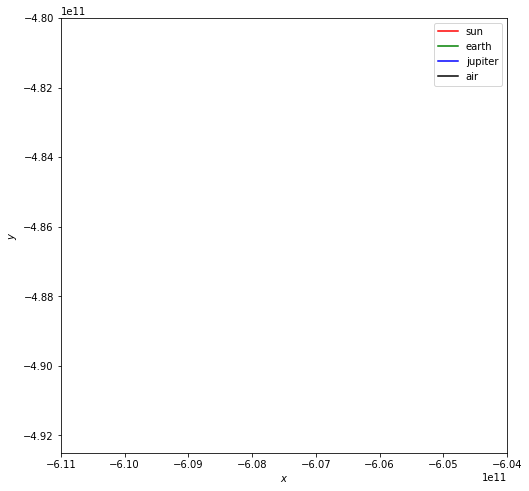

In [7]:
t = np.arange(0, 10**7, 1000)
x = odeint(T1, x1, t, args=(m, G))
plt.figure(figsize=(8, 8))
plt.plot(x[:, 0], x[:, 1], 'r')
plt.plot(x[:, 2], x[:, 3], 'g')
plt.plot(x[:, 4], x[:, 5], 'b')
plt.plot(x[:, 6], x[:, 7], 'k')
plt.legend(["sun", "earth", "jupiter", "air"])
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.axis([-6.11*10**11, -6.04*10**11, -4.925*10**11, -4.8*10**11])

In [8]:
m_H = 3.32*10**(-25)/1000
m_He = 6.64*10**(-24)/1000
T = 273.15
k = 1.3806488*10**(-23)
VV = np.sqrt(np.pi*k*T/2/m_H)
xita = np.arange(0, 2*np.pi, np.pi/360)
V_x = (x0[9]/m3+VV*np.cos(xita))*m_H
V_y = (x0[11]/m3+VV*np.sin(xita))*m_H

In [11]:
def r(x1, x2, y1, y2):
    return np.power(((x1-x2)**2+(y1-y2)**2), 3/2)


def T1(w, t, m, G):
    x1, y1, x2, y2, x3, y3, x4, y4, p1x, p1y, p2x, p2y, p3x, p3y, p4x, p4y = w
    m1, m2, m3, m4 = m
    return np.array([
        p1x/m1,
        p1y/m1,
        p2x/m2,
        p2y/m2,
        p3x/m3,
        p3y/m3,
        p4x/m4,
        p4y/m4,
        (-G*m1*m2*(x1-x2)/r(x1, x2, y1, y2)-G*m1*m3*(x1-x3) /
         r(x1, x3, y1, y3)-G*m1*m4*(x1-x4)/r(x1, x4, y1, y4)),
        (-G*m1*m2*(y1-y2)/r(x1, x2, y1, y2)-G*m1*m3*(x1-x3) /
         r(x1, x3, y1, y3)-G*m1*m4*(x1-x4)/r(x1, x4, y1, y4)),
        (G*m1*m2*(x1-x2)/r(x1, x2, y1, y2)-G*m2*m3*(x2-x3) /
         r(x2, x3, y2, y3)-G*m2*m4*(x2-x4)/r(x2, x4, y2, y4)),
        (G*m1*m2*(y1-y2)/r(x1, x2, y1, y2)-G*m2*m3*(y2-y3) /
         r(x2, x3, y2, y3)-G*m2*m4*(y2-y4)/r(x2, x4, y2, y4)),
        (G*m1*m3*(x1-x3)/r(x1, x3, y1, y3)+G*m2*m3*(x2-x3) /
         r(x2, x3, y2, y3)-G*m3*m4*(x3-x4)/r(x3, x4, y3, y4)),
        (G*m1*m3*(y1-y3)/r(x1, x3, y1, y3)+G*m2*m3*(y2-y3) /
         r(x2, x3, y2, y3)-G*m3*m4*(y3-y4)/r(x3, x4, y3, y4)),
        (G*m1*m4*(x1-x4)/r(x1, x4, y1, y4)+G*m2*m4*(x2-x4) /
         r(x2, x4, y2, y4)+G*m3*m4*(x3-x4)/r(x3, x4, y3, y4)),
        (G*m1*m4*(y1-y4)/r(x1, x4, y1, y4)+G*m2*m4*(y2-y4) /
         r(x2, x4, y2, y4)+G*m3*m4*(y3-y4)/r(x3, x4, y3, y4)),
    ])

In [12]:
m1 = 1.9891*10**30  # 太阳质量
m2 = 1.90*10**27  # 木星质量
m3 = 5.965*10**24  # 地球质量
G = 6.754*10**(-11)  # 引力常量
r2 = 7.79*10**11  # 木星与太阳的距离
r3 = 1.496*10**11  # 日地距离
v2 = 1.307*10**4  # 木星公转速度
v3 = 2.9783*10**4  # 地球平均公转速度
m_H = 10**(-10)
m = np.array([m1, m3, m2, m_H])

In [13]:
# x00=track0[-1]
x0 = track0[-1]
x1 = np.zeros((1, 16))
x1[0, 0] = x0[0]
x1[0, 1] = x0[2]
x1[0, 2] = x0[8]
x1[0, 3] = x0[10]
x1[0, 4] = x0[4]
x1[0, 5] = x0[6]
x1[0, 6] = x0[8]
# x1[0,7] = x0[10]+6371000
x1[0, 7] = x0[10]+909000
# x1[0,7] = x0[10]
x1[0, 8] = x0[1]
x1[0, 9] = x0[3]
x1[0, 10] = x0[9]
x1[0, 11] = x0[11]
x1[0, 12] = x0[5]
x1[0, 13] = x0[7]
# x1[0,14] = (x0[9]/m2-461)*m4
# x1[0,15] = (x0[11]/m2)*m4
x1 = x1.reshape(16)
t = np.arange(0, 10**7, 5000)

In [15]:
# x = odeint(T1,x1,t,args=(m,G))
X_sunx = []
X_suny = []
X_jupiterx = []
X_jupitery = []
X_earthx = []
X_earthy = []
X_airx = []
X_airy = []
m_H = 3.32*10**(-25)/1000
m_He = 6.64*10**(-24)/1000
T = 273
k = 1.3806488*10**(-23)
VV = np.sqrt(np.pi*k*T/2/m_H)
# xita = np.arange(0,2*np.pi,np.pi/360)
# V_x = (x0[9]/m3+VV*np.cos(xita))*m_H
# V_y = (x0[11]/m3+VV*np.sin(xita))*m_H
for i in range(360):

    x1[14] = (x0[9]/m3+VV*np.cos(i*np.pi/360))*m_H
    x1[15] = (x0[11]/m3+VV*np.sin(i*np.pi/360))*m_H
    print("i=", i)
    print(x0[9]/m3+VV*np.cos(i*np.pi/360))
    print(x0[11]/m3+VV*np.sin(i*np.pi/360))
    track = odeint(T1, x1, t, args=(m, G))
#     for q in range()
    X_sunx.append(track[:, 0])
    X_suny.append(track[:, 1])
    X_jupiterx.append(track[:, 2])
    X_jupitery.append(track[:, 3])
    X_earthx.append(track[:, 4])
    X_earthy.append(track[:, 5])
    X_airx.append(track[:, 6])
    X_airy.append(track[:, 7])

i= 0
4222.929489709829
-29783.0
i= 1
4222.7686934946405
-29746.14845590092
i= 2
4222.286317094328
-29709.299718189595
i= 3
4221.4823972437225
-29672.45659304007
i= 4
4220.356995164434
-29635.621886198976
i= 5
4218.910196560187
-29598.798402771845
i= 6
4217.1421116102965
-29561.988947009508
i= 7
4215.052874961278
-29525.196322094536
i= 8
4212.64264571659
-29488.423329927762
i= 9
4209.911607424521
-29451.672770914916
i= 10
4206.859968064212
-29414.94744375335
i= 11
4203.4879600298145
-29378.250145218917
i= 12
4199.795840112794
-29341.583669952975
i= 13
4195.783889482379
-29304.950810249582
i= 14
4191.452413664142
-29268.35435584283
i= 15
4186.801742516737
-29231.79709369441
i= 16
4181.832230206777
-29195.281807781375
i= 17
4176.544255181865
-29158.811278884124
i= 18
4170.938220141773
-29122.38828437463
i= 19
4165.014552007772
-29086.01559800494
i= 20
4158.773701890127
-29049.69598969595
i= 21
4152.216145053736
-29013.432225326444
i= 22
4145.34238088194
-28977.227066522482
i= 23
4138.1529

i= 186
-221.01105299048984
-25565.857888389703
i= 187
-257.803677905464
-25567.94712503872
i= 188
-294.57667007223625
-25570.35735428341
i= 189
-331.3272290850826
-25573.08839257548
i= 190
-368.0525562466495
-25576.14003193579
i= 191
-404.7498547810839
-25579.512039970185
i= 192
-441.4163300470239
-25583.204159887206
i= 193
-478.049189750419
-25587.21611051762
i= 194
-514.6456441571709
-25591.54758633586
i= 195
-551.2029063055886
-25596.198257483262
i= 196
-587.7181922186232
-25601.167769793225
i= 197
-624.1887211158761
-25606.455744818137
i= 198
-660.6117156253729
-25612.061779858228
i= 199
-696.9844019950607
-25617.98544799223
i= 200
-733.3040103040516
-25624.226298109872
i= 201
-769.5677746735571
-25630.783854946265
i= 202
-805.7729334775174
-25637.65761911806
i= 203
-841.9167295529165
-25644.847067161507
i= 204
-877.9964104097472
-25652.351651572295
i= 205
-914.0092284406248
-25660.170800847278
i= 206
-949.952441130025
-25668.303919527953
i= 207
-985.8233112631427
-25676.7503882458

Text(0,0.5,'$y$')

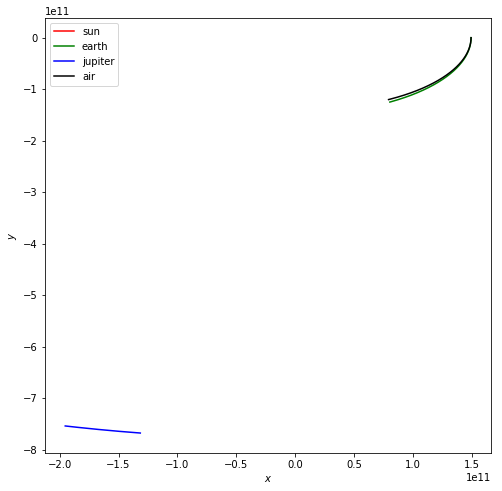

In [16]:
# t = np.arange(0,10**7,1000)
# x = odeint(T1,x1,t,args=(m,G))
sb = 100
plt.figure(figsize=(8, 8))
plt.plot(X_sunx[sb][:1000, ], X_suny[sb][:1000, ], 'r')
plt.plot(X_jupiterx[sb][:1000, ], X_jupitery[sb][:1000, ], 'g')
plt.plot(X_earthx[sb][:1000, ], X_earthy[sb][:1000, ], 'b')
plt.plot(X_airx[sb][:1000, ], X_airy[sb][:1000, ], 'k')
plt.legend(["sun", "earth", "jupiter", "air"])
plt.xlabel("$x$")
plt.ylabel("$y$")
# plt.axis([1.4*10**11,1.45*10**11,-0.5*10**11,0.3*10**11])

In [18]:
X_sunx = np.array(X_sunx)
X_sunx = X_sunx.T
X_suny = np.array(X_suny)
X_suny = X_suny.T
X_earthx = np.array(X_earthx)
X_earthx = X_earthx.T
X_earthy = np.array(X_earthy)
X_earthy = X_earthy.T
X_jupiterx = np.array(X_jupiterx)
X_jupiterx = X_jupiterx.T
X_jupitery = np.array(X_jupitery)
X_jupitery = X_jupitery.T
X_airx = np.array(X_airx)
X_airx = X_airx.T
X_airy = np.array(X_airy)
X_airy = X_airy.T
t = t.reshape(len(t), 1)

In [20]:
import scipy.io as sio
sio.savemat('data.mat', {'t': t, 'X_sunx': X_sunx, 'X_suny': X_suny, 'X_earthx': X_earthx, 'X_earthy': X_earthy,
                         'X_jupiterx': X_jupiterx, 'X_jupitery': X_jupitery, 'X_airx': X_airx, 'X_airy': X_airy})

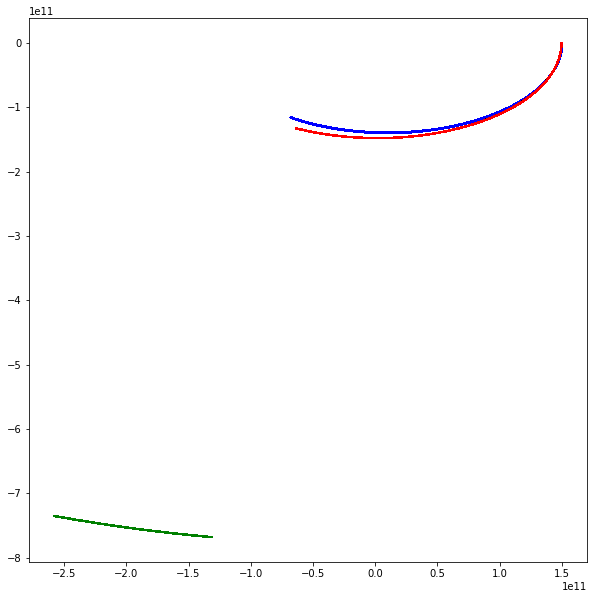

In [21]:
plt.figure(figsize=(10, 10))
for i in range(360):
    plt.scatter(X_airx[:, i], X_airy[:, i], s=0.04, c='b', label='air')
    plt.plot(X_jupiterx[:, i], X_jupitery[:, i], 'r', label='jupiter')
    plt.plot(X_earthx[:, i], X_earthy[:, i], 'g', label='earth')
# plt.axis([0,1.5*10**11,-1*10**11,-0.1**11])
# plt.legend(loc='upper right',fontsize=7)